In [13]:
import numpy as np
import numba as nb


@nb.njit()
def ascii_conversion(plaintext: str) -> np.ndarray:
    str_characters = list(plaintext)
    str_characters = [ord(s) for s in str_characters]
    str_array = np.array(str_characters)

    return str_array

In [19]:
plaintext = "Hello World."

ascii_table = ascii_conversion(plaintext)

In [17]:
test_array = np.array([[1, 2, 3], [4, 5, 6]])
test_array[0, 2]

3

In [23]:
@nb.njit()
def cantor_inverse(ascii_table: np.ndarray) -> np.ndarray:
    cantor_points = np.zeros(shape=(ascii_table.shape[0], 2), dtype=np.int64)

    for i in nb.prange(cantor_points.shape[0]):
        n = np.floor((-1 + np.sqrt(1 + 8*ascii_table[i])) / 2)
        cantor_points[i][0] = ascii_table[i] - (0.5)*n*(n+1)
        cantor_points[i][1] = n - cantor_points[i][0]
    
    return cantor_points

In [24]:
cantor_inverse(ascii_table)

array([[ 6,  5],
       [10,  3],
       [ 3, 11],
       [ 3, 11],
       [ 6,  8],
       [ 4,  3],
       [ 9,  3],
       [ 6,  8],
       [ 9,  5],
       [ 3, 11],
       [ 9,  4],
       [ 1,  8]], dtype=int64)

In [3]:
from Encryption import Encrypt

plaintext = "Hello World."

encryptor = Encrypt(plaintext, 4, -1, -4, 2, 1)

cantor_points = encryptor.get_cantor_points()
encrypted_points = encryptor.get_encrypted_points()

print(cantor_points)

[[ 6  5]
 [10  3]
 [ 3 11]
 [ 3 11]
 [ 6  8]
 [ 4  3]
 [ 9  3]
 [ 6  8]
 [ 9  5]
 [ 3 11]
 [ 9  4]
 [ 1  8]]


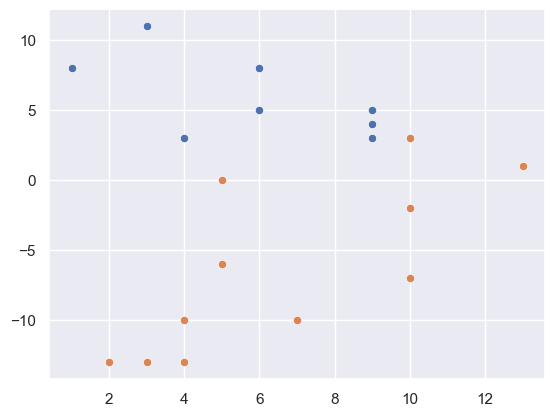

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

sns.scatterplot(x=cantor_points[:, 0], y=cantor_points[:, 1])
sns.scatterplot(x=encrypted_points[:, 0], y=encrypted_points[:, 1])
plt.show()